### Exercise 1 ###


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

#Tickers for Intuitive Surgical and Franklin Resources
Tickers = ['BEN','ISRG']
start = '2019-07-01'
end = '2024-06-30'
stock1_weights = np.array([160, 140, 120, 100, 80, 60, 40, 20, 0, -20, -40, -60])
stock2_weights = np.array([-60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160])
course = pd.DataFrame()
for Ticker in Tickers:
    x = yf.download(Ticker, start= start, end = end, auto_adjust=True)
    course[Ticker]= x['Close']
    course[Ticker +': '+'Change'] = x['Close'].pct_change()
    course[Ticker + 'log_return'] = np.log(x['Close'] / x['Close'].shift(1))


stock1_mean = course['BENlog_return'].mean()
stock2_mean = course['ISRGlog_return'].mean()
stock1_std = course['BENlog_return'].std()
stock2_std = course['ISRGlog_return'].std()
print(course)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  BEN  BEN: Change  BENlog_return        ISRG  ISRG: Change  \
Date                                                                          
2019-07-01  27.516993          NaN            NaN  176.436661           NaN   
2019-07-02  27.414789    -0.003714      -0.003721  176.506668      0.000397   
2019-07-03  27.713541     0.010897       0.010839  179.059998      0.014466   
2019-07-05  27.744995     0.001135       0.001134  179.083328      0.000130   
2019-07-08  27.485550    -0.009351      -0.009395  177.720001     -0.007613   
...               ...          ...            ...         ...           ...   
2024-06-24  22.510460     0.014893       0.014783  429.040009     -0.008138   
2024-06-25  22.199568    -0.013811      -0.013907  442.309998      0.030929   
2024-06-26  22.053839    -0.006565      -0.006586  442.559998      0.000565   
2024-06-27  21.888680    -0.007489      -0.007517  445.109985      0.005762   
2024-06-28  22.016739     0.005850       0.005833  4

### Exercise 2 ###

In [2]:
def plot_courses(Tickers,course):
    plt.figure(figsize=(10, 6))

    for Ticker in Tickers:
        plt.plot(course.index, course[Ticker], label=Ticker)

    plt.title('Stock prices Across Time', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Dollar', fontsize=12)

    # Add a legend with stock names (column names)
    plt.legend(title='Stocks', fontsize=10)

    # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [3]:
def plot_pct (Tickers, course):   
    plt.figure(figsize=(10, 6))
        
    for Ticker in Tickers:
        plt.plot(course.index, course[Ticker +'log_return'].cumsum(), label=Ticker)
        
    plt.title('Cumulative Percentage Across Time', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Percent', fontsize=12)
        
        # Add a legend with stock names (column names)
    plt.legend(title='Stocks', fontsize=10)
        
        # Show the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

-0.00017740708248323837
0.0007357002473799132
0.4534621274989477


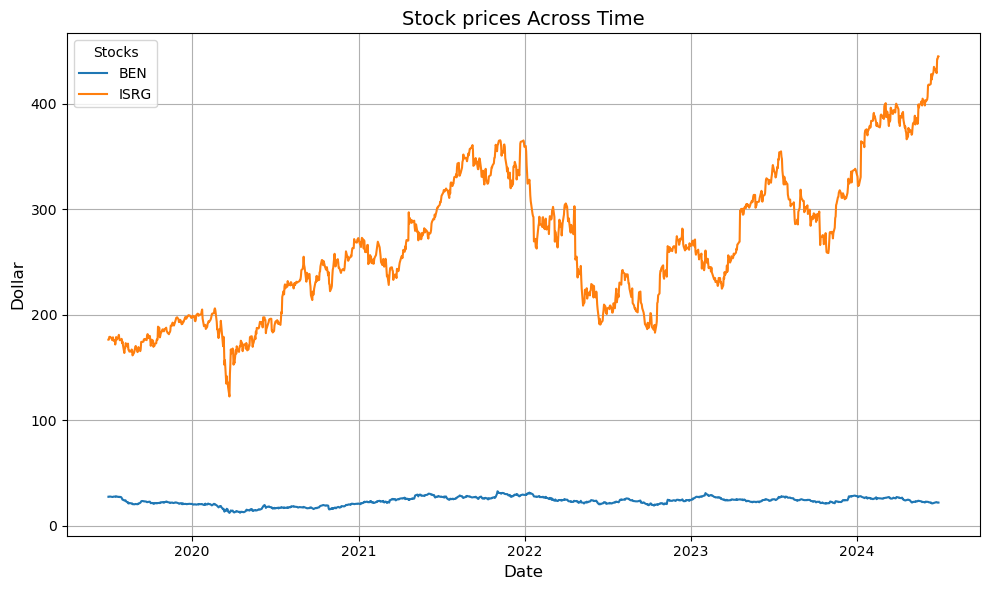

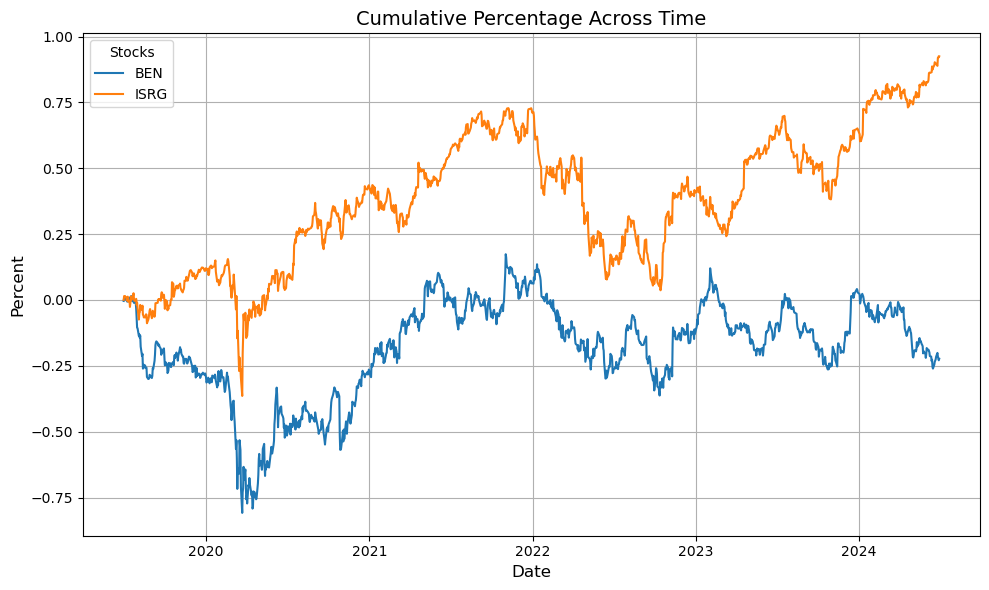

In [4]:
correlation = course['BENlog_return'].corr(course['ISRGlog_return'])
covariance = course['BENlog_return'].cov(course['ISRGlog_return'])
print(course['BENlog_return'].mean())
print(course['ISRGlog_return'].mean())
print(correlation)
plot_courses(Tickers, course)
plot_pct(Tickers, course)

In [5]:
print(course['BENlog_return'].std(),
course['ISRGlog_return'].std())

0.023831635524177767 0.022266918051566848


### Exercise 3 ###

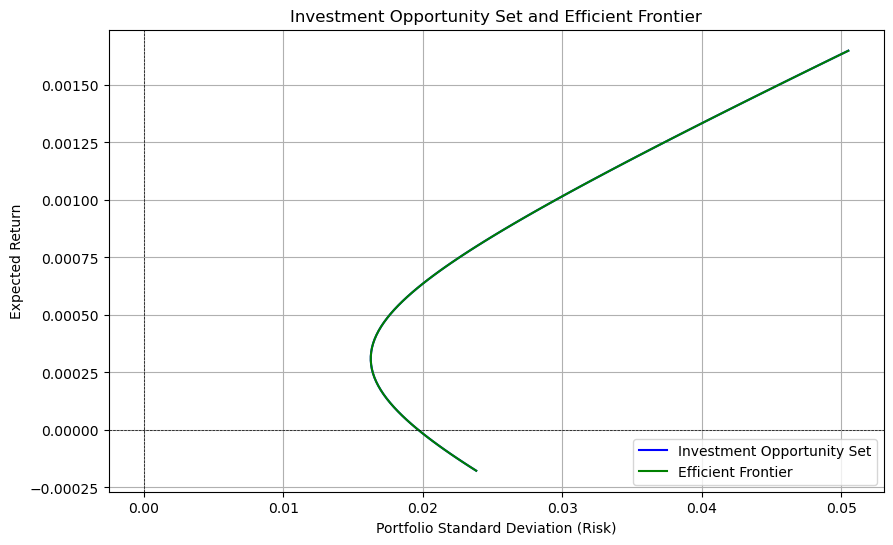

In [6]:
weights = np.linspace(-1, 1, 100)
expected_returns = np.zeros(weights.shape)
portfolio_std = np.zeros(weights.shape)

for i, w1 in enumerate(weights):
    w2 = 1 - w1  
    
    
    expected_returns[i] = w1 * stock1_mean + w2 * stock2_mean
    
    portfolio_variance = (w1**2 * stock1_std**2 + w2**2 * stock2_std**2 + 2 * w1 * w2 * stock1_std * stock2_std * covariance)
    
    if portfolio_variance >= 0:
        portfolio_std[i] = np.sqrt(portfolio_variance)
    else:
        portfolio_std[i] =portfolio_std[i]*-1 

valid_mask = ~np.isnan(portfolio_std)
portfolio_std_valid = portfolio_std[valid_mask]
expected_returns_valid = expected_returns[valid_mask]


plt.figure(figsize=(10, 6))
plt.plot(portfolio_std_valid, expected_returns_valid, label='Investment Opportunity Set', color='blue')

efficient_frontier_mask = portfolio_std_valid <= np.nanmax(portfolio_std_valid)
plt.plot(portfolio_std_valid[efficient_frontier_mask], expected_returns_valid[efficient_frontier_mask], color='green', label='Efficient Frontier')

plt.title('Investment Opportunity Set and Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

### Exercise 4 ###

In [7]:
returns_stock1 = course['BENlog_return'].sum()/len(course['BENlog_return']) # mean daily returns of stock 1
returns_stock2 = course['ISRGlog_return'].sum()/len(course['ISRGlog_return'])  # mean daily returns of stock 2
stock1_std = course['BENlog_return'].std()
stock2_std = course['ISRGlog_return'].std()

for i in range(len(stock1_weights)):
    portfolio_return = stock1_weights[i] * returns_stock1 + stock2_weights[i] * returns_stock2
    portfolio_standarddev = (stock1_weights[i]**2 * stock1_std**2) + (stock2_weights[i]**2 * stock2_std**2)+ (2*stock2_weights[i] * stock1_weights[i] * covariance)
    if (portfolio_standarddev < 0):
        portfolio_standarddev = portfolio_standarddev*(-1)
    portfolio_standarddev = np.sqrt(portfolio_standarddev)
    print(f"Portfolio Return with weights {stock1_weights[i]:.2f} (Stock 1) and {stock2_weights[i]:.2f} (Stock 2):")
    print(portfolio_return)
    print(f'Portfolio STD: {portfolio_standarddev:.4f}')

Portfolio Return with weights 160.00 (Stock 1) and -60.00 (Stock 2):
-0.07246949529922253
Portfolio STD: 3.4211
Portfolio Return with weights 140.00 (Stock 1) and -40.00 (Stock 2):
-0.05422186551165526
Portfolio STD: 3.0381
Portfolio Return with weights 120.00 (Stock 1) and -20.00 (Stock 2):
-0.03597423572408799
Portfolio STD: 2.6873
Portfolio Return with weights 100.00 (Stock 1) and 0.00 (Stock 2):
-0.017726605936520718
Portfolio STD: 2.3832
Portfolio Return with weights 80.00 (Stock 1) and 20.00 (Stock 2):
0.0005210238510465551
Portfolio STD: 2.1455
Portfolio Return with weights 60.00 (Stock 1) and 40.00 (Stock 2):
0.018768653638613825
Portfolio STD: 1.9982
Portfolio Return with weights 40.00 (Stock 1) and 60.00 (Stock 2):
0.0370162834261811
Portfolio STD: 1.9618
Portfolio Return with weights 20.00 (Stock 1) and 80.00 (Stock 2):
0.05526391321374837
Portfolio STD: 2.0422
Portfolio Return with weights 0.00 (Stock 1) and 100.00 (Stock 2):
0.07351154300131564
Portfolio STD: 2.2267
Portfo